In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [63]:
Yolo = cv2.dnn.readNet(
    r"E:\New folder\AI\projects\MY PROJECTS\OBD\yolov3-tiny.weights",
    r"E:\New folder\AI\projects\MY PROJECTS\OBD\yolov3-tiny.cfg"
)


In [64]:
classes = open(r"E:\New folder\AI\projects\MY PROJECTS\OBD\coco.names").read().splitlines()

In [65]:
len(classes)

80

In [66]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [47]:
img = cv2.imread(r"E:\New folder\AI\projects\MY PROJECTS\OBD\dog_bike_car.jpg")
blob = cv2.dnn.blobFromImage(img , 1/255 , (220,220), (0,0,0) , swapRB = True , crop = False )

In [48]:
blob.shape

(1, 3, 220, 220)

In [49]:
img.shape

(576, 768, 3)

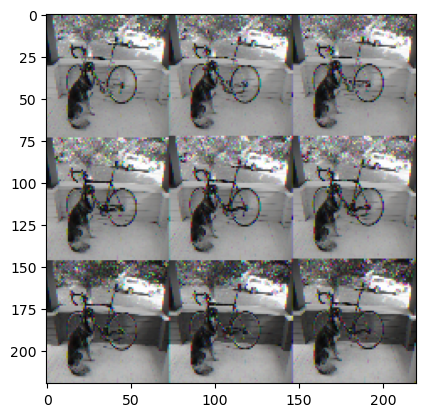

In [50]:
i = blob[0].reshape(220,220,3)
plt.imshow(i)

In [51]:
Yolo.setInput(blob)

In [52]:
output_layers_name = Yolo.getUnconnectedOutLayersNames()
layeroutput = Yolo.forward(output_layers_name)

In [53]:
height,width,_ = img.shape

In [54]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    
    for detection in output:
        
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.3:
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w /2)
            y = int(center_y - h /2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)





In [55]:
len(boxes)

5

In [56]:
indexes = cv2.dnn.NMSBoxes(boxes , confidences , 0.3 , 0.1)

In [57]:
print(indexes)


[1 3 4]


In [58]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255 , size = (len(boxes),3))

In [59]:
for i in indexes.flatten() :
    x,y,w,h, = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]



    cv2.rectangle(img,(x,y),(x+w ,y+h), color , 3 )
    cv2.putText(img, label + " "+ confi , (x,y+20),font , 2 , (255,255,255) , 3 )
    


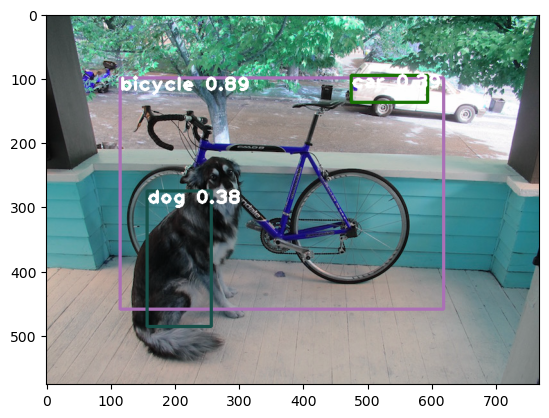

In [60]:
plt.imshow(img)